Creating the targeted data-set with the significant numerical features

This is a Regression Model that predicts students' marks based on a set of features.

In [2]:
import pandas as pd

# Load your dataset into a pandas DataFrame
data = pd.read_csv('student-mat.csv',  delimiter=';')

# Selecting numerical features manually 
selected_features=['G3', 'absences','failures', 'G1', 'G2' ] 

# Creating a new data-set of work using the selected features
selected_data = data[selected_features]
other_data= data_after_300 = selected_data.iloc[300:]
selected_data = selected_data.iloc[:300]


# Select the rows after the first 300
# Printing out selected data
print(selected_data.head())

#Making a csv file containing the data
selected_data.to_csv('selected_data.csv', index=False)

   G3  absences  failures  G1  G2
0   6         6         0   5   6
1   6         4         0   5   5
2  10        10         3   7   8
3  15         2         0  15  14
4  10         4         0   6  10


We cant first have a general picutre about our data, before selecting the good features : 

In [3]:
data=pd.read_csv('selected_data.csv')
data.describe()

,G3,absences,failures,G1,G2
count,300.000000,300.000000,300.000000,300.0000,300.000000
mean,10.520000,5.756667,0.320000,10.7600,10.673333
std,4.530417,8.150187,0.765651,3.3705,3.914635
min,0.000000,0.000000,0.000000,3.0000,0.000000
25%,8.000000,0.000000,0.000000,8.0000,8.000000
50%,11.000000,4.000000,0.000000,10.0000,11.000000
75%,14.000000,8.000000,0.000000,13.0000,13.000000
max,20.000000,75.000000,3.000000,19.0000,19.000000


Having a general summary about the regression model using statsmodels, and training the model using our training section of the data-set

In [3]:
import pandas as pd
import statsmodels.api as sm

# Load data
data = pd.read_csv('selected_data.csv')

# Prepare data
X = data[data.columns.tolist()[1:]]
y = data['G3']

# Add constant to the independent vcorrelation_matrix = data.corr()ariables (statsmodels requires explicitly adding a constant)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Analyze results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     462.2
Date:                Sun, 02 Jun 2024   Prob (F-statistic):          1.13e-125
Time:                        15:31:46   Log-Likelihood:                -580.91
No. Observations:                 300   AIC:                             1172.
Df Residuals:                     295   BIC:                             1190.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0771      0.385     -2.798      0.0

General normality check 

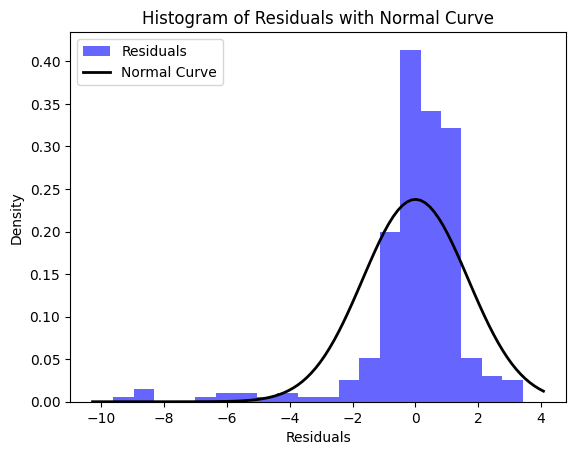

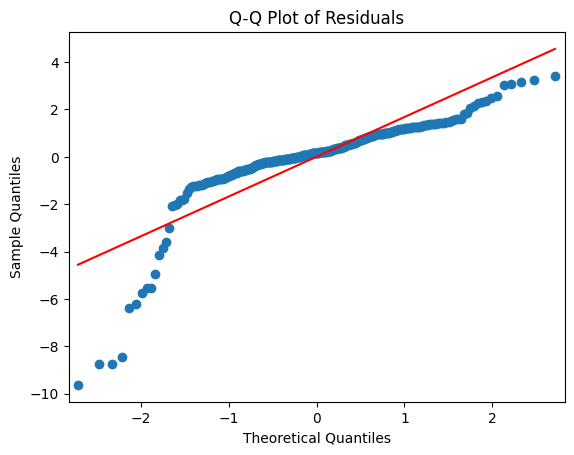

Standard Errors of Coefficients: const       0.384978
absences    0.012024
failures    0.140175
G1          0.054664
G2          0.046510
dtype: float64


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm

# Load data
data = pd.read_csv('selected_data.csv')

# Prepare data
X = data[data.columns.tolist()[1:]]
y = data['G3']

# Add constant to the independent variables (statsmodels requires explicitly adding a constant)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid
z_scores = np.abs((residuals - np.mean(residuals)) / np.std(residuals))

# Define a threshold for outlier detection (e.g., Z-score > 3)
threshold = 3

# Get indices of outliers
outlier_indices = np.where(z_scores > threshold)

outlier_indices_flat = outlier_indices[0]

# Remove outliers from the DataFrame
selected_data = selected_data.drop(selected_data.index[outlier_indices_flat])
# Plot histogram of residuals
plt.hist(residuals, bins=20, density=True, alpha=0.6, color='b', label='Residuals')

# Overlay a normal distribution curve
mu, std = np.mean(residuals), np.std(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Curve')

plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals with Normal Curve')
plt.legend()
plt.show()

# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()
# Get the standard errors of the coefficients
coefficients_se = model.bse
print("Standard Errors of Coefficients:", coefficients_se)


seeking variable combinations with high $R^2$ coeficients 

In [5]:
from itertools import combinations
import statsmodels.api as sm
import numpy as np

predictor_vars = selected_features[1:]

results = []

for r in range(1, len(predictor_vars) + 1):
    for combo in combinations(predictor_vars, r):
        # Select predictor variables for the current combination
        X_train = data[list(combo)]
        y_train = data[selected_features[0]]  # Corrected y_train selection

        # Fit the OLS model
        mod = sm.OLS(y_train, sm.add_constant(X_train)).fit()

        # Store results
        results.append((combo, mod))

final = {'combination': [], 'R^2': [], 'RMSE': []}  # Using a dictionary to store final results
for combo, mod in results:
    final['combination'].append(combo)
    final['R^2'].append(mod.rsquared)
    final['RMSE'].append(np.sqrt(np.mean(mod.resid**2)))


In [6]:
final = pd.DataFrame(final)
final.sort_values(by='R^2',ascending=False,inplace=True)


Making an html file that contains all combinations and looking for the highest (sorted acending order)

In [7]:
final.to_html("hhn.html",index=False)

In [8]:
correlation_matrix = data.corr()

# Print or display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                G3  absences  failures        G1        G2
G3        1.000000  0.004344 -0.399095  0.805894  0.925362
absences  0.004344  1.000000  0.026455 -0.054242 -0.038455
failures -0.399095  0.026455  1.000000 -0.404299 -0.380104
G1        0.805894 -0.054242 -0.404299  1.000000  0.842181
G2        0.925362 -0.038455 -0.380104  0.842181  1.000000


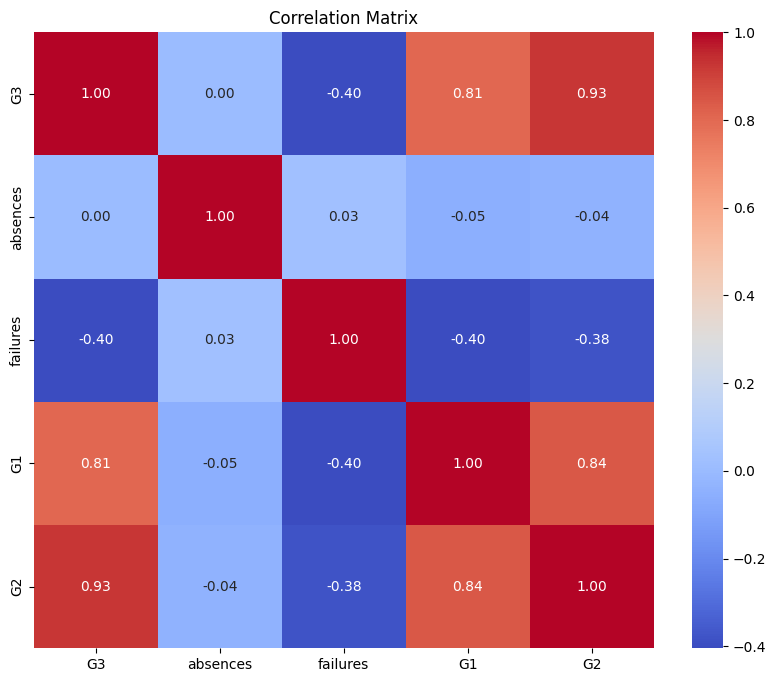

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


checking VIF values of all variables

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF values
print(vif)

   Features  VIF Factor
0     const   15.533044
1  absences    1.003168
2  failures    1.203203
3        G1    3.545869
4        G2    3.462609


t-test for individual variables

Text(0.5, 1.0, 'T-test p-values for Individual Coefficients')

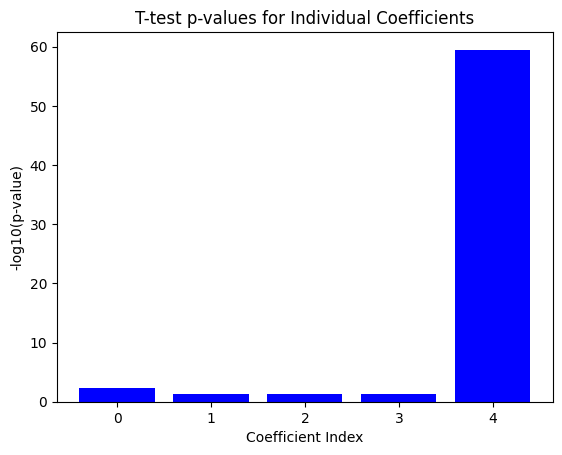

In [11]:
t_test_results = model.t_test(np.eye(len(model.params)))  # Perform t-tests for all coefficients

# Extract p-values from t-test results
p_values = t_test_results.pvalue

# Plot p-values
plt.bar(range(len(p_values)), -np.log10(p_values), color='blue')
plt.xlabel('Coefficient Index')
plt.ylabel('-log10(p-value)')
plt.title('T-test p-values for Individual Coefficients')


F-test for overall significance

In [12]:
F_statistic = model.fvalue
print("F-statistic:", F_statistic)

F-statistic: 462.2339605402973


In [13]:

# Assuming 'model' contains your trained multiple linear regression model
# 'selected_features' is a list containing the names of the features you want to use for prediction
# 'other_data' is a DataFrame containing your data after the first 300 rows

# Extract the features for the data after 300 rows
X_after_300 = other_data[selected_features[1:]]
print(X_after_300)
print(sm.add_constant(X_after_300.shape))
# Predict the values for the data after 300 rows
predicted_values_after_300 = model.predict(sm.add_constant(X_after_300))

# Extract the actual values for the data after 300 rows
actual_values_after_300 = other_data['G3']  # Replace 'Your_Target_Column_Name' with the actual name of your target column

# Create a DataFrame to compare the actual and predicted values
comparison_after_300 = pd.DataFrame({'Actual': actual_values_after_300, 'Predicted': predicted_values_after_300})

# Display the comparison DataFrame
print(comparison_after_300)
print(comparison_after_300.head(30))


     absences  failures  G1  G2
300        14         0  12  10
301         0         0  11  11
302         0         0  15  12
303         0         0  17  17
304        20         1  15  14
..        ...       ...  ..  ..
390        11         2   9   9
391         3         0  14  16
392         3         3  10   8
393         0         0  11  12
394         5         0   8   9

[95 rows x 4 columns]
[[ 1. 95.]
 [ 1.  4.]]
     Actual  Predicted
300      11  10.284105
301      10  10.819358
302      14  12.226177
303      18  17.308347
304      13  14.358755
..      ...        ...
390       9   8.347031
391      16  16.080547
392       7   7.010147
393      10  11.792416
394       9   8.665552

[95 rows x 2 columns]
     Actual  Predicted
300      11  10.284105
301      10  10.819358
302      14  12.226177
303      18  17.308347
304      13  14.358755
305      12  12.021887
306      18  18.281405
307       8   9.157853
308      12  11.942118
309      10  10.094151
310       0   8.37

$\textbf{accuracy of the predictions}$ 

Here we show that indeed our predictions are of good accuracy : 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#We compare integer parts:
y_true_int = np.floor(actual_values_after_300,).astype(int)
y_pred_int = np.floor(predicted_values_after_300).astype(int)
# Calculate metrics

# Calculate MAE using integer parts
mae_int = mean_absolute_error(y_true_int, y_pred_int)
print("Mean Absolute Error (MAE) using integer parts:", mae_int)

# Calculate MSE using integer parts
mse_int = mean_squared_error(y_true_int, y_pred_int)
print("Mean Squared Error (MSE) using integer parts:", mse_int)

# Calculate RMSE using integer parts
rmse_int = np.sqrt(mse_int)
print("Root Mean Squared Error (RMSE) using integer parts:", rmse_int)


# Calculate R-squared using integer parts
r2_int = r2_score(y_true_int, y_pred_int)
print("R-squared (R²) using integer parts:", r2_int)

Mean Absolute Error (MAE) using integer parts: 1.431578947368421
Mean Squared Error (MSE) using integer parts: 6.126315789473685
Root Mean Squared Error (RMSE) using integer parts: 2.475139549494873
R-squared (R²) using integer parts: 0.7253844319942783


### Interpretation of the Results

Let's break down and interpret each of the metrics obtained from comparing the integer parts of your actual and predicted values:

1. **Mean Absolute Error (MAE):** 1.431578947368421
2. **Mean Squared Error (MSE):** 6.126315789473685
3. **Root Mean Squared Error (RMSE):** 2.475139549494873
4. **R-squared (R²):** 0.7253844319942783

### Explanation and Evaluation

1. **Mean Absolute Error (MAE):**
   - **Value:** 1.431578947368421
   - **Interpretation:** On average, the absolute difference between the actual and predicted integer values is about 1.43 units. Lower values are better, and this indicates that the predictions are relatively close to the actual values.

   $$
   \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |
   $$

2. **Mean Squared Error (MSE):**
   - **Value:** 6.126315789473685
   - **Interpretation:** This is the average of the squared differences between the actual and predicted integer values. Since it squares the differences, it penalizes larger errors more than smaller ones. Lower values indicate better performance.

   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$

3. **Root Mean Squared Error (RMSE):**
   - **Value:** 2.475139549494873
   - **Interpretation:** This is the square root of the MSE, and it is in the same units as the target values. An RMSE of about 2.48 means that, on average, the predictions are about 2.48 units away from the actual values. Lower values are better.

   $$
   \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
   $$

4. **R-squared (R²):**
   - **Value:** 0.7253844319942783
   - **Interpretation:** R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² value of about 0.725 means that approximately 72.5% of the variance in the actual values is explained by the model. Higher values are better, and this value indicates a good fit, though not perfect.

   $$
   R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
   $$

### Overall Evaluation

- **MAE** and **RMSE** provide insight into the average error and the typical size of the error, respectively. In your case, the values indicate a moderate level of error.
- **MSE** shows that there are some larger errors due to the squaring of differences.
- **R-squared** indicates that the model explains a substantial portion of the variance in the data, which is a positive sign.

### Conclusion

Your model appears to perform reasonably well based on these metrics, especially considering the integer parts of the values:

- **MAE** and **RMSE** suggest that the predictions are relatively close to the actual values.
- **R-squared** indicates a good fit with the data, explaining a significant portion of the variance.

However, whether these values are "good" also depends on the specific context and requirements of your problem domain. For example, in some applications, even a small error can be critical, while in others, a larger error might be acceptable. Comparing these metrics against a baseline model or other models can give you a better sense of how well our model is performing.
